# Using other test statistics

In [1]:
import pandas as pd
import numpy as np
from lr.stats.h_testing import get_boots_series_under_H0
import matplotlib.pyplot as plt

In [2]:
model =  "bert_base"
batch = 3
path = "raw_results/snli/{}/syn_p_h/batch{}/rho_1p00_results.csv".format(model,batch)
df = pd.read_csv(path)

In [3]:
def abs_diff(results):
    return np.abs((results.A.mean()* 100) - (results.B.mean()* 100)) 

In [4]:
diff_h0 = get_boots_series_under_H0(df, abs_diff, 5000, None)
def upper_tail_f(x): return (diff_h0.sort_values() > x).astype(int).mean()

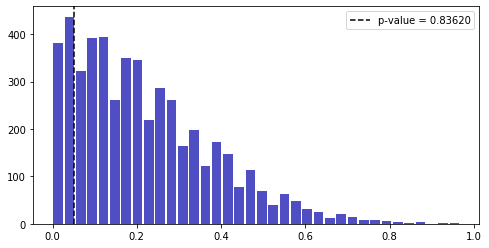

In [5]:
# obs = 0.8
obs = abs_diff(df)
p_value = upper_tail_f(obs)

fig, ax = plt.subplots(figsize = (8,4))
n, bins, patches = plt.hist(x=diff_h0, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85);
plt.axvline(obs, linestyle='--', color='k', label="p-value = {:.5f}".format(p_value));
ax.legend(loc="best");